In [2]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd

In [3]:
grouped_dataframes = pd.read_pickle('grouped_dataframes.pkl')

In [48]:
for i in range(0,len(names)):
    print(names[i])
    print(grouped_dataframes[names[i]]['traffic_flow'].mean())

('0 450-0 7/ 300 +', 552601.0, 6329842.0)
98.4452628753765
('0 450-0 7/ 300 +1', 552601.0, 6329842.0)
17.281543554110876
('0 450-0 7/ 300 +2', 552601.0, 6329842.0)
81.16371932126562
('0 450-0 7/ 300 -', 552601.0, 6329842.0)
100.75251245042197
('0 450-0 7/ 300 -1', 552601.0, 6329842.0)
16.479110130319388
('0 450-0 7/ 300 -2', 552601.0, 6329842.0)
84.27340232010259
('0 450-0 7/ 300 T', 552601.0, 6329842.0)
199.19777532579846
('0 450-0 9/1675 +', 549360.0, 6330576.0)
75.10419506285022
('0 450-0 9/1675 -', 549360.0, 6330576.0)
79.83791879112188
('0 450-0 9/1675 -1', 549360.0, 6330576.0)
4.512881350228011
('0 450-0 9/1675 -2', 549360.0, 6330576.0)
75.32503744089387
('0 450-0 9/1675 T', 549360.0, 6330576.0)
154.9421138539721
('0 70-0 277/ 100 +', 552269.0, 6311346.0)
243.60496382558904
('0 70-0 277/ 100 -', 552269.0, 6311346.0)
268.5357590482251
('0 70-0 277/ 100 T', 552269.0, 6311346.0)
383.1573385858821
('0 70-0 278/ 201 +', 552730.0, 6312348.0)
219.878362505536
('0 70-0 278/ 201 +1', 5527

In [49]:
grouped_dataframes[('0 450-0 9/1675 -1', 549360.0, 6330576.0)]

,Vej-Id,Kilometer,Retning,Spor,Dato,Aarstal,Maened,Dag,Dagtype,Trafiktype,Xkoordinat,Ykoordinat,time_interval,traffic_flow,time_start
datetime,,,,,,,,,,,,,,,
1672527600,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,00:00-00:15,0.0,00:00
1672528500,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,00:15-00:30,1.0,00:15
1672529400,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,00:30-00:45,0.0,00:30
1672530300,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,00:45-01:00,1.0,00:45
1672531200,0 450-0 9/1675 -1,9.0,-,1.0,01.01.2023,2023.0,1.0,1.0,Helligdag,BY,549360.0,6330576.0,01:00-01:15,2.0,01:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1704059100,0 450-0 9/1675 -1,9.0,-,1.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,549360.0,6330576.0,22:45-23:00,1.0,22:45
1704060000,0 450-0 9/1675 -1,9.0,-,1.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,549360.0,6330576.0,23:00-23:15,NaN,23:00
1704060900,0 450-0 9/1675 -1,9.0,-,1.0,31.12.2023,2023.0,12.0,31.0,Helligdag,BY,549360.0,6330576.0,23:15-23:30,NaN,23:15


In [ ]:
names = list(grouped_dataframes.keys())
#grouped_dataframes[names[0]].head()

cleaned_dataframes = {}
for name in names:
    df = grouped_dataframes[name]
    cleaned_dataframes[name] = df[['traffic_flow', 'Xkoordinat', 'Ykoordinat']]

In [58]:
cleaned_dataframes[names[i]]['Xkoordinat'].first_valid_index()

1675206000

In [63]:
graph = nx.Graph()

for i in range(0,len(names)):
    idx = cleaned_dataframes[names[i]].first_valid_index()
    graph.add_node(i, x=cleaned_dataframes[names[i]]['Xkoordinat'][idx], y=cleaned_dataframes[names[i]]['Ykoordinat'][idx], traffic=cleaned_dataframes[names[i]]['traffic_flow'].to_dict())
    

In [ ]:
graph.nodes(data=True)

KeyError: 'crs'

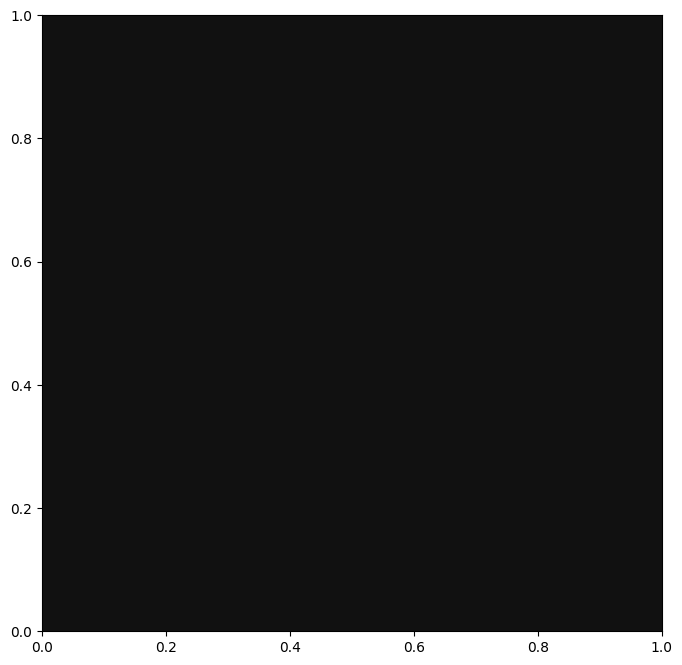

In [60]:
ox.plot_graph(graph)